<a href="https://colab.research.google.com/github/Veshek/HairlineClassification/blob/master/Hairline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
from PIL import Image
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
def build_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional layer: 32 filters, kernel size of 3x3, activation function ReLU
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Another convolutional layer: 64 filters
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flattening the 2D arrays for fully connected layers
        Flatten(),

        # Dropout for regularization
        Dropout(0.5),

        # Dense (fully connected) layer: 128 neurons
        Dense(128, activation='relu'),

        # Output layer: 'num_classes' neurons for classification
        Dense(num_classes, activation='softmax')
    ])

    return model

In [43]:

def compile_model(model):
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# Define image dimensions and batch size
img_height, img_width = 64, 64  # Change this to the dimensions you want
batch_size = 32

# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation: Random rotations
    width_shift_range=0.2,  # Data augmentation: Random horizontal shifting
    height_shift_range=0.2,  # Data augmentation: Random vertical shifting
    shear_range=0.2,  # Data augmentation: Random shearing
    zoom_range=0.2,  # Data augmentation: Random zooming
    # horizontal_flip=True,  # Data augmentation: Random horizontal flips
    # fill_mode='nearest',  # Fill strategy for new pixels
    validation_split=0.2  # Splitting data: 20% for validation
)

# Flow training images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScienceProjects/HairlineClassificationProject/Data/Train',  # This is the source directory for training images
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical' if more than two classes
    subset='training'  # Set as training data
)

# Similarly setup validation generator if needed
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScienceProjects/HairlineClassificationProject/Data/Val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical' if more than two classes
    subset='validation'  # Set as validation data
)


Found 258 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


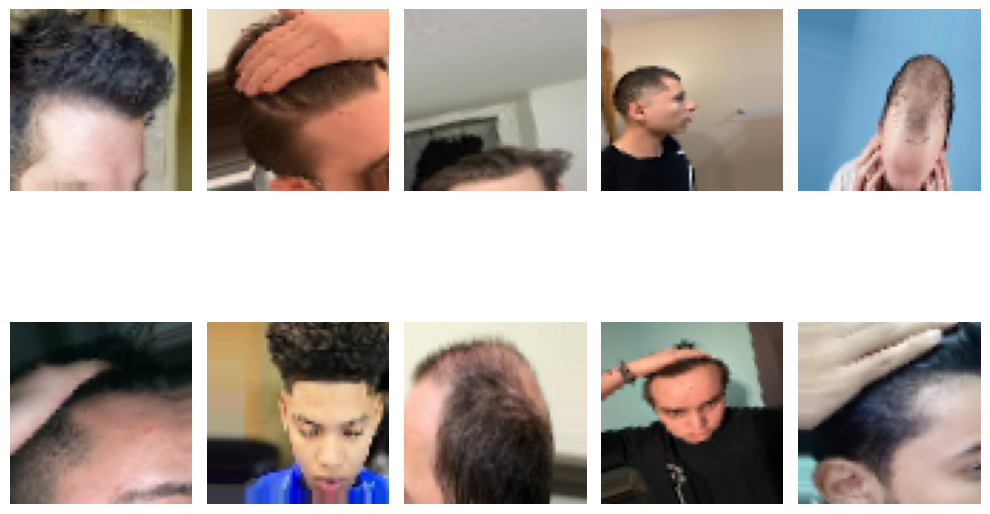

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

def save_and_display_augmented_images(generator, file_path, num_images=10):
    # Get a batch of images
    batch = next(generator)
    images = batch[0]  # batch[0] contains the image data

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_images // 5 + 1, 5, i + 1)
        img = array_to_img(images[i])
        plt.imshow(img)
        plt.axis('off')

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()

# Example usage
save_and_display_augmented_images(train_generator, '/content/drive/MyDrive/augmented_images.png')

In [47]:
# Define model parameters
input_shape = (img_height, img_width, 3)  # Adjust the third dimension based on your image channels
num_classes = 2  # Adjust this based on the number of categories you have

# Build and compile the model
model = build_model(input_shape, num_classes)
model = compile_model(model)

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Setup callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=6,  # Set the number of epochs according to your need
    validation_data=validation_generator,
    validation_steps=6,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)



Epoch 1/6
6/6 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5417


Epoch 1: accuracy improved from -inf to 0.54167, saving model to best_model.h5
6/6 [==============================] - 5s 724ms/step - loss: 0.6900 - accuracy: 0.5417 - val_loss: 0.6838 - val_accuracy: 0.7500
Epoch 2/6
6/6 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.5494
Epoch 2: accuracy improved from 0.54167 to 0.54938, saving model to best_model.h5
6/6 [==============================] - 2s 319ms/step - loss: 0.6888 - accuracy: 0.5494
Epoch 3/6
6/6 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5000
Epoch 3: accuracy did not improve from 0.54938
6/6 [==============================] - 2s 344ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 4/6
6/6 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5679
Epoch 4: accuracy improved from 0.54938 to 0.56790, saving model to best_model.h5
6/6 [==============================] - 2s 318ms/step - loss: 0.6939 - accuracy: 0.5679
Epoch 5/6
6/6 [==============================]

In [ ]:
train_generator.batch_size

In [ ]:
train_generator.samples/train_generator.batch_size
